In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import os
path = '/Users/rajkannanrajan/Desktop/data/mnist_train.csv'
data = pd.read_csv(path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data.shape

(450, 785)

In [65]:
cols=data.shape[1]
print ("columns={}".format(cols))

columns=785


In [66]:
y=np.array(data.iloc[:,:1])
x=np.array(data.iloc[:,1:cols])

In [67]:
x.shape, y.shape

((450, 784), (450, 1))

In [68]:
np.unique(y)

array([0, 1, 2, 3])

In [69]:
rows=x.shape[0]

In [70]:
x = np.insert(x, 0, values=np.ones(rows), axis=1)
x.shape

(450, 785)

In [71]:
params = x.shape[1]
all_theta=np.zeros((4, params))
all_theta.shape

(4, 785)

In [72]:
print(all_theta)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [74]:
a = sigmoid(2)
print(a)

0.880797077978


In [75]:
def computeCost(theta, x, y):
    theta = np.matrix(theta)
    x=np.matrix(x)
    y=np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(x * theta.T)))
    
    second = np.multiply((1-y), np.log(1 - sigmoid(x * theta.T)))
    
    cost = np.sum(first - second)
    cost = cost/(2*len(x))
    return cost
    

In [76]:
cost = computeCost(all_theta, x, y)
print("cost = {}".format(cost))

cost = 1.3862943611198904


In [77]:
learning_rate=1
def gradient(theta, x, y):
    theta = np.matrix(theta)
    x=np.matrix(x)
    y=np.matrix(y)
    
    error=sigmoid(x * theta.T) - y
    grad=((x.T * error) / (2 * len(x)))
    grad = grad * learning_rate
    return grad

In [78]:
from scipy.optimize import minimize

def one_vs_all (x, y, classes, new_theta):
    params = x.shape[1]
    rows = x.shape[0]
    
    for i in range(0, classes):
        theta=np.zeros(params)
        theta = new_theta[i,:]
        y_i = np.array ([1 if label == 1 else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))
        fmin = minimize(fun=computeCost, x0=theta, args=(x, y_i), method='TNC', jac=gradient)
        all_theta[i,:] = fmin.x
        
    return all_theta

In [79]:
classes = 4
new_theta = one_vs_all (x, y, classes, all_theta)

/Users/rajkannanrajan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log
/Users/rajkannanrajan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply


In [80]:
print(new_theta)

[[-0.00815753  0.          0.         ...,  0.          0.          0.        ]
 [-0.00815753  0.          0.         ...,  0.          0.          0.        ]
 [-0.00815753  0.          0.         ...,  0.          0.          0.        ]
 [-0.00815753  0.          0.         ...,  0.          0.          0.        ]]


In [81]:
computeCost(new_theta, x, y)

46.156290832364242

In [82]:
def predict_all(x, theta):
    x=np.matrix(x)
    theta=np.matrix(theta)   
    h=sigmoid(x * theta.T)
    h_argmax=np.argmax(h, axis=1)
    return h_argmax
    

In [83]:
print(x.size)

353250


In [84]:
y_pred = predict_all (x, new_theta)

In [85]:
print(y_pred)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [86]:
correct = [1 if a == b else 0 for (a,b) in zip(y_pred, y)]
print(correct)
accuracy = (sum(map(int, correct)) / float(len(correct)))
print("Training data={}%".format(accuracy * 100))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

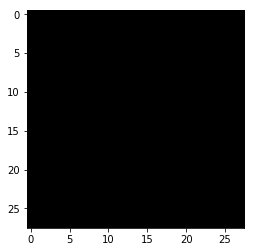

In [87]:
import matplotlib.image as mpimg
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299,0.587,0.114])

img = mpimg.imread('/Users/rajkannanrajan/Desktop/data/test-image-one.png')
gray = rgb2gray(img)

plt.imshow(gray,cmap=plt.get_cmap('gray'))


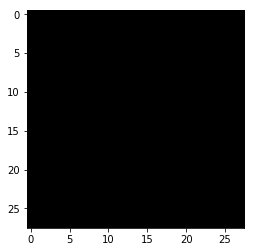

In [88]:
grarray=np.asarray(gray)
bw=(grarray < (grarray.mean()))*255
plt.imshow(np.reshape(bw, (28,28)), cmap=plt.cm.gray)

In [89]:
bw=bw.ravel()
bw=bw.reshape(1,-1)
brows=bw.shape[0]
bw=np.insert(bw, 0, values=np.ones(brows), axis=1)

In [90]:
pred=predict_all(bw, new_theta)
print(pred)

[[0]]
